# GENDER BIAS: NOBEL FOUNDATION
The nobel prize is one of the most prestigious awards in the science community. Every year it is awarded to proffesionals in the fields of Literature, Chemistry, Physiology or Medicine, Physics, Peace and Economics. The first prize was awarded in 1901, and it is recorded that at that time the Nobel Prize was quite male-centered and eurocentric. However, the Nobel Foundation has claims that this gender bias has been minimised.

The purpose of this analysis is to explore whether data insights are in accordance with their claims. A dataset provided by the Nobel Foundation has been used.

## 1. Load the required libraries and the Nobel Prize dataset

In [1]:
#load in libraries
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
#read in csv file
nobel = pd.read_csv('nobel.csv')
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


### 1.1 Explore and clean dataset

In [3]:
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

<AxesSubplot: >

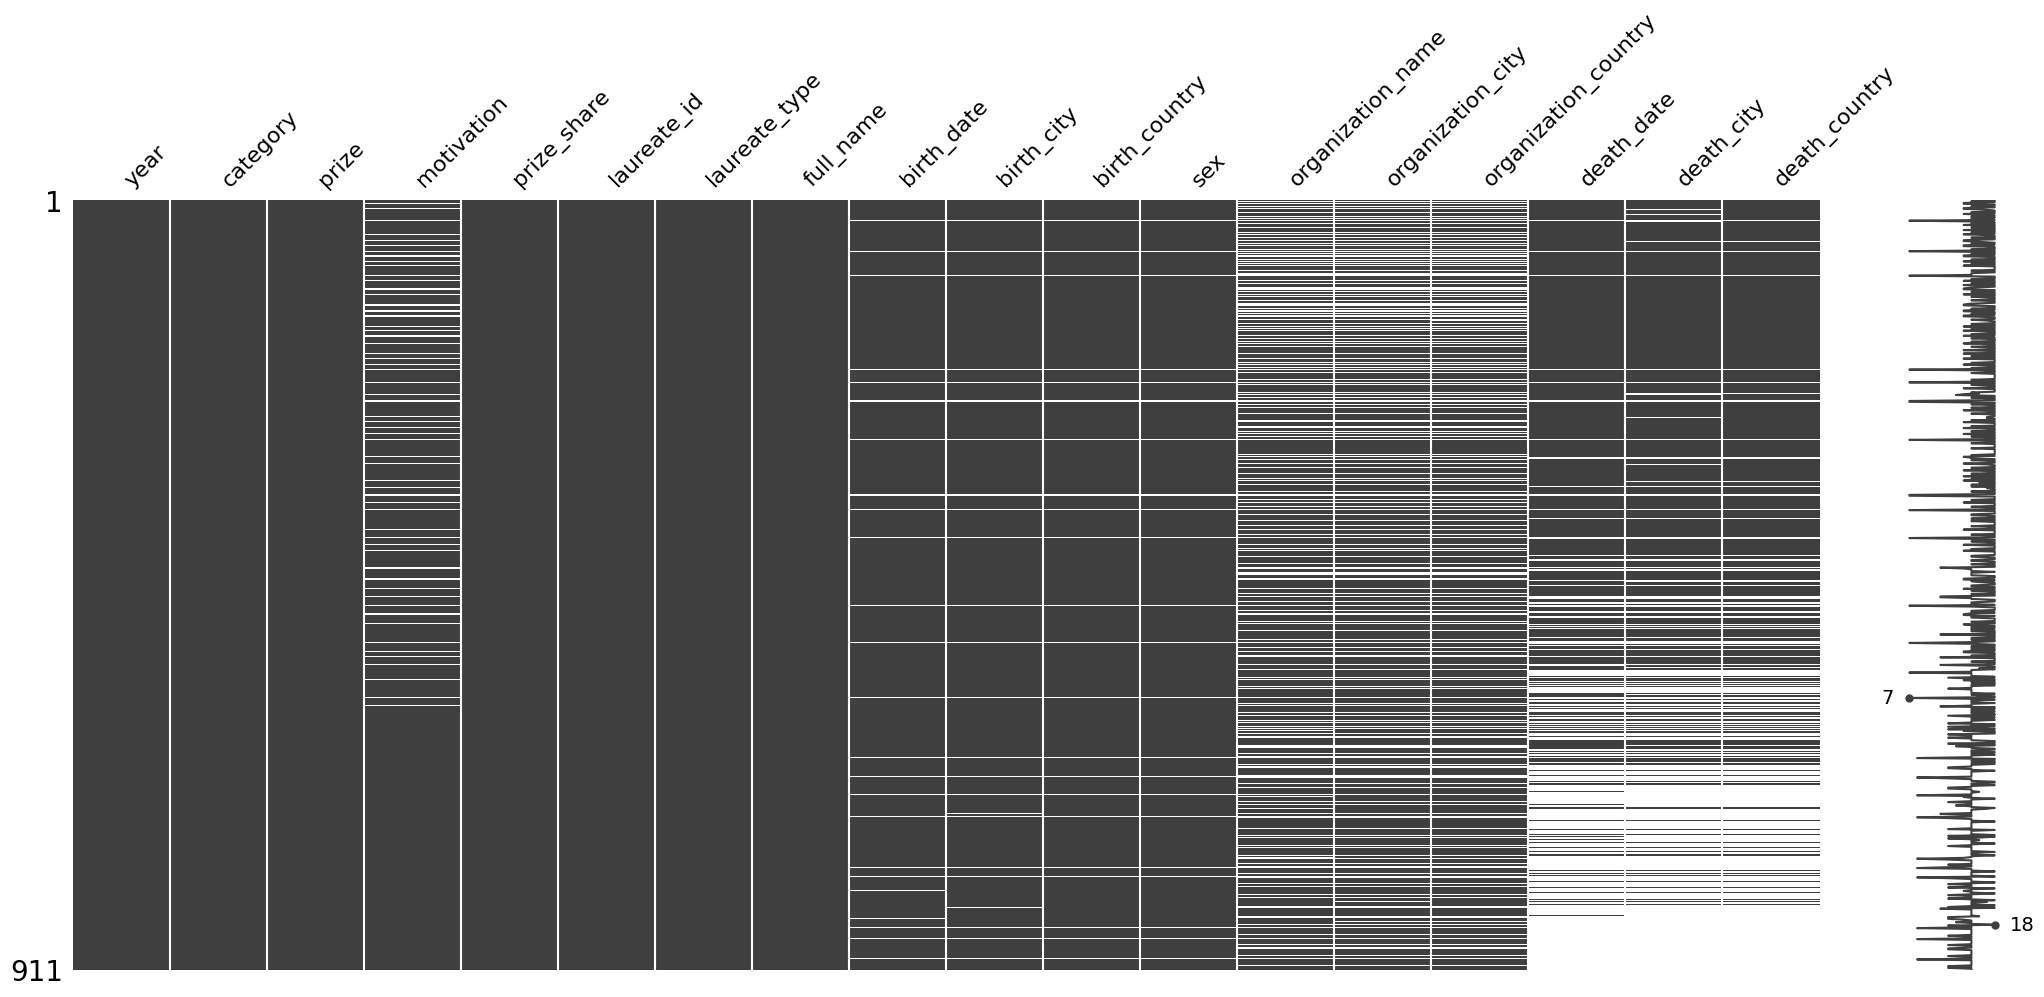

In [4]:
#analyse data sparsity
msno.matrix(nobel)

<AxesSubplot: >

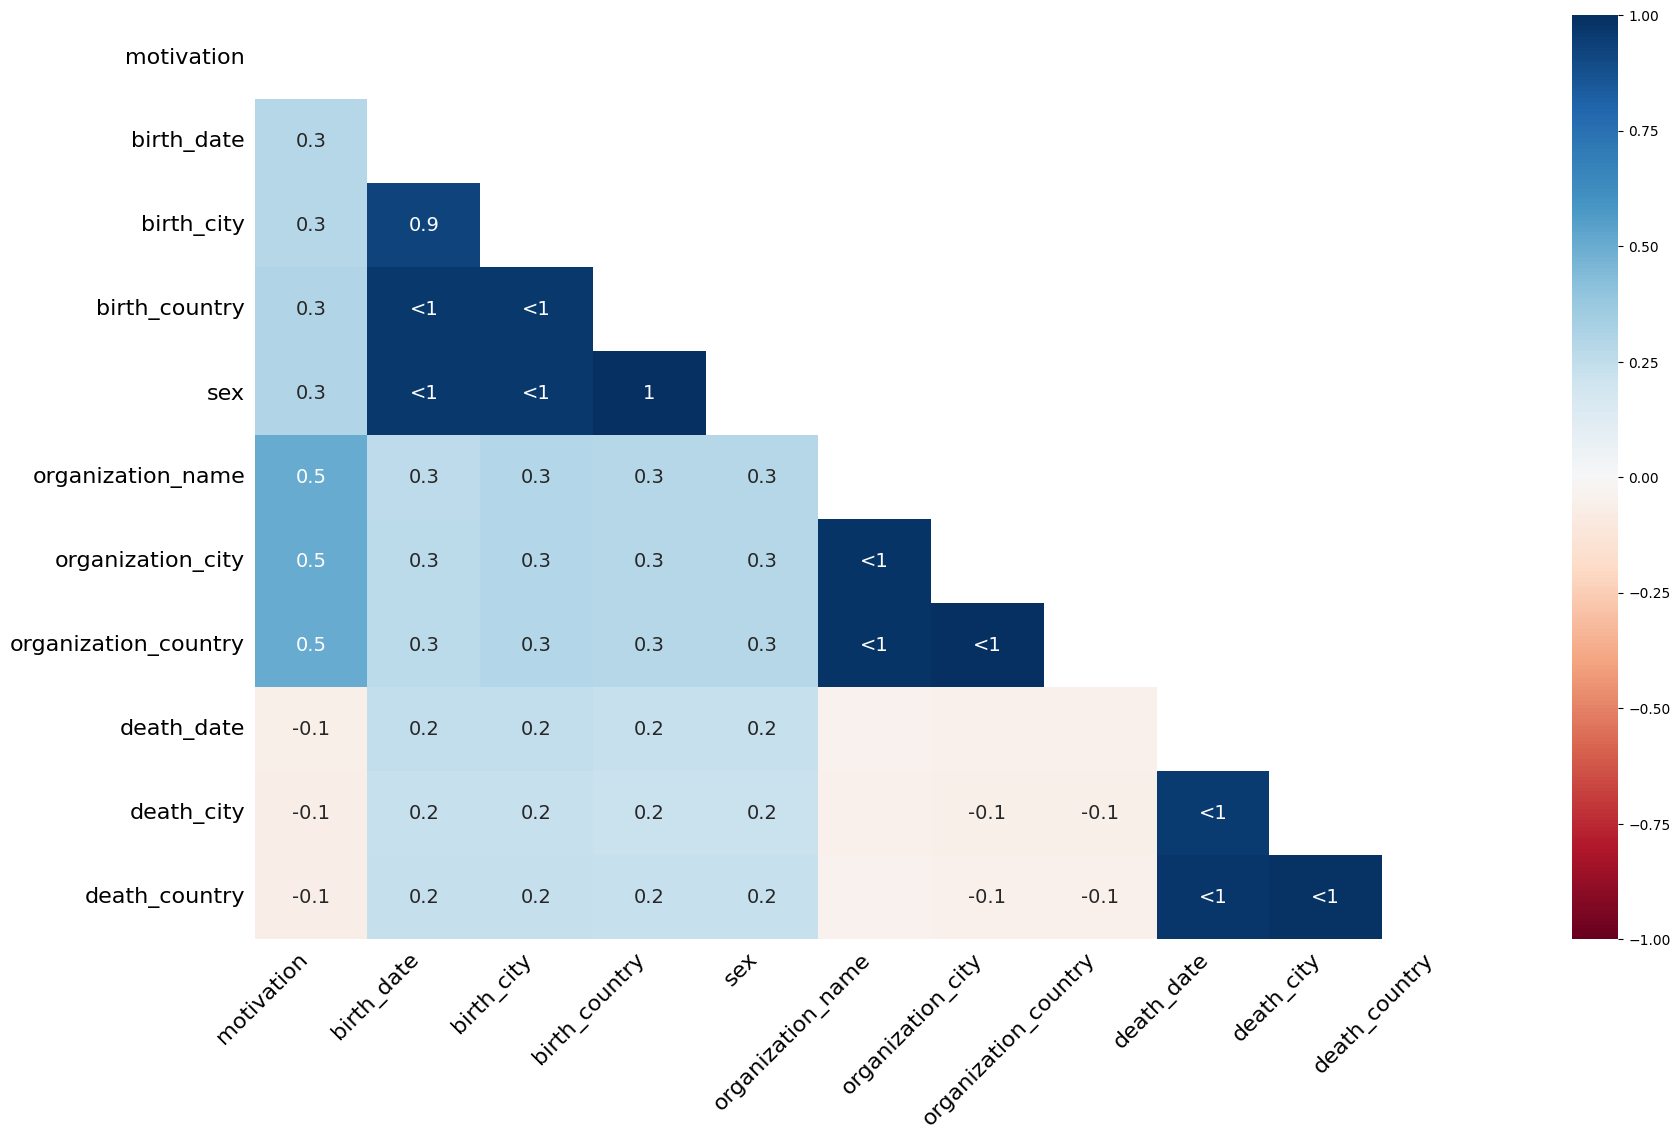

In [5]:
msno.heatmap(nobel)

From analysis it is evident that most columns are not missing at random, therefore they don't need to be dropped.

In [6]:
#convert birth_date to datetime format
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'], format='%Y-%m-%d')

In [7]:
nobel['birth_date'].head()

0   1852-08-30
1   1839-03-16
2   1854-03-15
3   1828-05-08
4   1822-05-20
Name: birth_date, dtype: datetime64[ns]

In [8]:
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


##   2. Which sex and which country is the most commonly represented?

### 2.1 Most Represented Country

In [9]:
#how many prizes have been given altogether?
num_prize = len(nobel['prize'])
display(num_prize)

911

In [10]:
#top 10 countries with the most award winners
country_most_awards = nobel['birth_country'].value_counts().head(10)
country_most_awards

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Italy                        17
Russia                       17
Name: birth_country, dtype: int64

In [11]:
#which gender won more awards from 1901 to 2016?
gender_most_awards = nobel['sex'].value_counts()
gender_most_awards

Male      836
Female     49
Name: sex, dtype: int64

From analysis we see that most Nobel Prize winners from 1901 to 2016 are USA (United States of America) nationals. In addition, most awards were won by males. When considering the awards won by USA nationals, which decade had more or less awards?

In [12]:
#create column for USA winners
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'

In [13]:
nobel['usa_born_winner']

0      False
1      False
2      False
3      False
4      False
       ...  
906    False
907    False
908    False
909    False
910    False
Name: usa_born_winner, Length: 911, dtype: bool

In [14]:
#create column that show the decade a prize was won
nobel['year'].dtype
nobel['decade'] = np.floor(nobel['year'])

In [15]:
# create df that displays the proprtion of USA born winners per decade
prop_usa_winners = nobel.groupby(['decade'], as_index=False)['usa_born_winner'].mean()

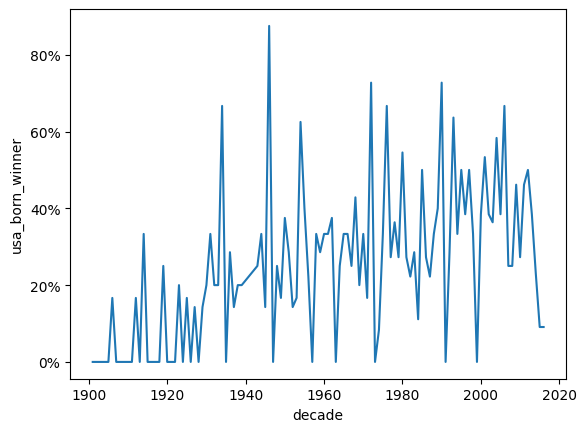

In [16]:
#visualise prop_usa_winners

ax = sns.lineplot(x='decade', y='usa_born_winner', data=prop_usa_winners)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.show()

### 2.2 Info on Female Lauretes

In [17]:
#create female winner column
nobel['female_winner'] = nobel['sex'] == 'Female'

In [18]:
# create df that displays the proprtion of female lauretes per decade split by category
prop_female_winners = nobel.groupby(['decade','category'], as_index=False)['female_winner'].mean()

In [19]:
prop_female_winners.head()

,decade,category,female_winner
0,1901.0,Chemistry,0.0
1,1901.0,Literature,0.0
2,1901.0,Medicine,0.0
3,1901.0,Peace,0.0
4,1901.0,Physics,0.0


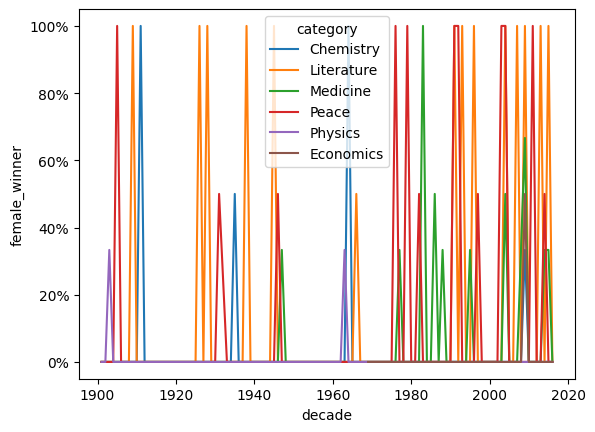

In [20]:
#visualise prop female winners
ax = sns.lineplot(x='decade', y='female_winner', data=prop_female_winners, hue='category')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.show()

The plot above is hard to decipher as the lines are overplotting. However, it does show some interesting trends and patterns. Overall an imbalance exists within the disciplines, with physics, economics, and chemistry having the largest imbalance. Medicine has a somewhat positive trend, and since the 1990s the literature prize is also now more balanced. 

Given this imbalance, who was the first woman to receive a Nobel Prize? And in what category?

In [21]:
female_winners = nobel[nobel['sex'] == 'Female']
female_winners.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1903.0,True
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,468,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Female,NaN,NaN,NaN,1914-06-21,Vienna,Austria,False,1905.0,True
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,579,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Female,NaN,NaN,NaN,1940-03-16,Mårbacka,Sweden,False,1909.0,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1911.0,True
128,1926,Literature,The Nobel Prize in Literature 1926,"""for her idealistically inspired writings whic...",1/1,597,Individual,Grazia Deledda,1871-09-27,"Nuoro, Sardinia",Italy,Female,NaN,NaN,NaN,1936-08-15,Rome,Italy,False,1926.0,True


In [22]:
#first woman to get an award
female_winners.nsmallest(1, 'year')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1903.0,True


The first female laurete is Marie Curie, née Sklodowska from France. She was awarded a Nobel Prize in Physics in the year 1903

## 3. How Many Repeat Nobel Prize Winners Were There?

In this section we analyse how many repeat nobel prize winners were present from 1901 to 2016

In [23]:
#check for repeat winners 
unique_id = nobel['laureate_id'].value_counts()
unique_id[unique_id >= 2]

482    3
515    2
66     2
217    2
222    2
6      2
Name: laureate_id, dtype: int64

In [24]:
repeat_winners = nobel.groupby('full_name', as_index=False).filter(lambda x: len(unique_id[x['laureate_id']]) >= 2)
repeat_winners

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1903.0,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1911.0,True
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1917.0,False
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1944.0,False
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1954.0,False
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1954.0,False
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,Male,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,True,1956.0,False
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,Male,University of Cambridge,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1958.0,False
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1962.0,False
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1963.0,False


In [25]:
#how many of the repeat winners were male or female?
repeat_winners['sex'].value_counts()

Male      6
Female    2
Name: sex, dtype: int64

Analysis shows that there are more repeat male winners than females

## 4. Age Difference Between Prize Categories

In [30]:
#calculate the age of nobel prize winners
nobel['year_awarded'] = pd.to_datetime(nobel['year'], format='%Y')
nobel['birth_year'] = pd.to_datetime(nobel['birth_date']).dt.year
nobel['age'] = nobel['year_awarded'].dt.year - nobel['birth_year']
nobel[['full_name','age']].head()

,full_name,age
0,Jacobus Henricus van 't Hoff,49.0
1,Sully Prudhomme,62.0
2,Emil Adolf von Behring,47.0
3,Jean Henry Dunant,73.0
4,Frédéric Passy,79.0


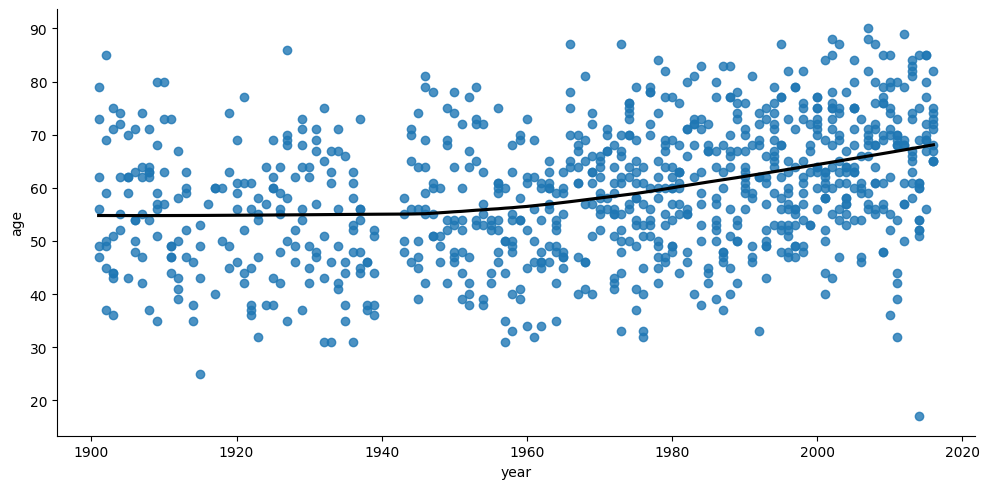

In [36]:
#visualise age trend on graph
sns.lmplot(x='year',y='age', lowess=True, aspect=2, line_kws={'color':'black'}, data=nobel)

According to the graph, award winners are mostly aged between 59 and 60 years.

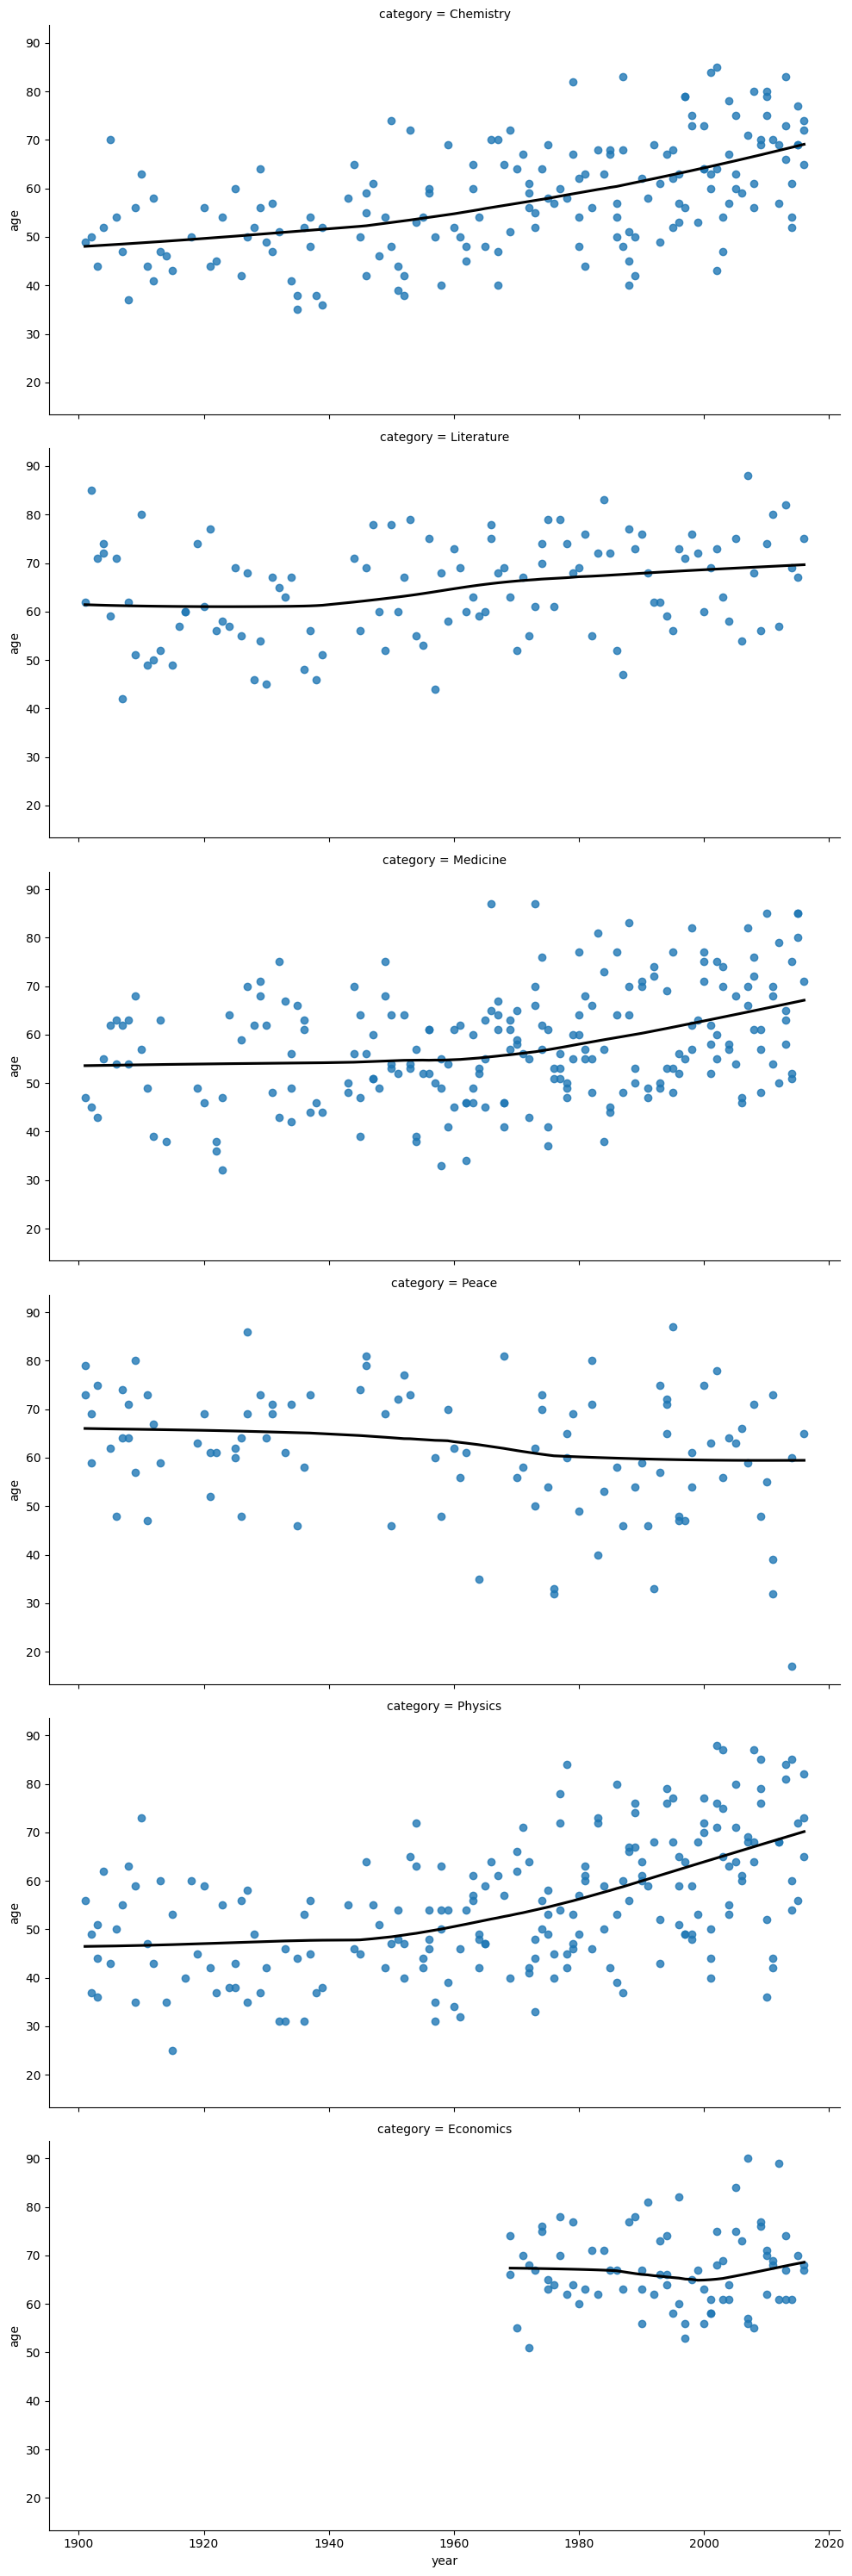

In [38]:
#visualise age indifference in differrent price categories
sns.lmplot(x='year',y='age', lowess=True, aspect=2, line_kws={'color':'black'}, row='category', data=nobel)

From the graphs we see that both winners of the chemistry, medicine, and physics category have gotten older over time. The trend is strongest for physics: the average age used to be below 50, however it increased to 70. Literature and economics are more stable. Additionally, it is evident that economics is a newer category. Lastly, peace shows an opposite trend where winners are getting younger

In [40]:
#find oldest and youngest winners of the Nobel Prize
oldest_winner = nobel.nlargest(5, 'age')
oldest_winner

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,year_awarded,birth_year,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,Russia,Male,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2007.0,False,2007-01-01,1917.0,90.0
856,2012,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the theory of stable allocations and the ...",1/2,883,Individual,Lloyd S. Shapley,1923-06-02,"Cambridge, MA",United States of America,Male,University of California,"Los Angeles, CA",United States of America,2016-03-12,"Tucson, AZ",United States of America,True,2012.0,False,2012-01-01,1923.0,89.0
744,2002,Physics,The Nobel Prize in Physics 2002,"""for pioneering contributions to astrophysics,...",1/4,753,Individual,Raymond Davis Jr.,1914-10-14,"Washington, DC",United States of America,Male,University of Pennsylvania,"Philadelphia, PA",United States of America,2006-05-31,"Blue Point, NY",United States of America,True,2002.0,False,2002-01-01,1914.0,88.0
796,2007,Literature,The Nobel Prize in Literature 2007,"""that epicist of the female experience, who wi...",1/1,817,Individual,Doris Lessing,1919-10-22,Kermanshah,Persia (Iran),Female,NaN,NaN,NaN,2013-11-17,London,United Kingdom,False,2007.0,True,2007-01-01,1919.0,88.0
373,1966,Medicine,The Nobel Prize in Physiology or Medicine 1966,"""for his discovery of tumour-inducing viruses""",1/2,383,Individual,Peyton Rous,1879-10-05,"Baltimore, MD",United States of America,Male,Rockefeller University,"New York, NY",United States of America,1972-02-16,"New York, NY",United States of America,True,1966.0,False,1966-01-01,1879.0,87.0


In [41]:
youngest_winner = nobel.nsmallest(5, 'age')
youngest_winner

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,year_awarded,birth_year,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Female,NaN,NaN,NaN,NaN,NaN,NaN,False,2014.0,True,2014-01-01,1997.0,17.0
85,1915,Physics,The Nobel Prize in Physics 1915,"""for their services in the analysis of crystal...",1/2,21,Individual,William Lawrence Bragg,1890-03-31,Adelaide,Australia,Male,Victoria University,Manchester,United Kingdom,1971-07-01,Ipswich,United Kingdom,False,1915.0,False,1915-01-01,1890.0,25.0
166,1932,Physics,The Nobel Prize in Physics 1932,"""for the creation of quantum mechanics, the ap...",1/1,38,Individual,Werner Karl Heisenberg,1901-12-05,Würzburg,Germany,Male,Leipzig University,Leipzig,Germany,1976-02-01,Munich,West Germany (Germany),False,1932.0,False,1932-01-01,1901.0,31.0
171,1933,Physics,The Nobel Prize in Physics 1933,"""for the discovery of new productive forms of ...",1/2,40,Individual,Paul Adrien Maurice Dirac,1902-08-08,Bristol,United Kingdom,Male,University of Cambridge,Cambridge,United Kingdom,1984-10-20,"Tallahassee, FL",United States of America,False,1933.0,False,1933-01-01,1902.0,31.0
189,1936,Physics,The Nobel Prize in Physics 1936,"""for his discovery of the positron""",1/2,43,Individual,Carl David Anderson,1905-09-03,"New York, NY",United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1991-01-11,"San Marino, CA",United States of America,True,1936.0,False,1936-01-01,1905.0,31.0


The youngest winner of the Nobel prize in 2014 was Malala Yousafzai, and at the time of the award she was 17 years old. On the other hand, the oldest winner of thr Nobel prize was in 2007; his name is Leonid Hurwicz and he was 90 years old on the year of the award.